#Fazendo leitura dos dados

In [1]:
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 31 kB/s 
     |████████████████████████████████| 199 kB 66.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=586be89c624d1a5b3366612fbce39338302285be50abd14e6611aef0c2d139d3
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master('local[*]').appName("Transformacao com Spark").getOrCreate()

spark

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dados = spark.read.parquet('/content/drive/MyDrive/Challenge_Data_Science_Alura/dados/dataset_parquet')

In [6]:
dados.show()

+--------------------+-----+---------+---------+-------+------+----+----------+------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+------------+----------+----------+--------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|condominio|  iptu|   valor|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+-----+---------+---------+-------+------+----+----------+------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+------------+----------+----------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|      2|     0|   1|     285.0|   0.0| 22999.0|       1|                 1|            1|                 1|       0|      0

#Preparação dos dados para os algoritmos do Spark MLlib

In [7]:
from pyspark.ml.feature import VectorAssembler

In [8]:
dados = dados.withColumnRenamed('valor','label')

In [9]:
X = []
for i in dados.columns:
  if i != 'id' and i != 'valor':
    X.append(i)
X

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'label',
 'Academia',
 'Animais permitidos',
 'Churrasqueira',
 'Condomínio fechado',
 'Elevador',
 'Piscina',
 'Playground',
 'Portaria 24h',
 'Portão eletrônico',
 'Salão de festas',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [10]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [11]:
dados_vetorizado = assembler.transform(dados).select('features', 'label')

In [12]:
dados_vetorizado.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------+--------+
|features                                                                                                   |label   |
+-----------------------------------------------------------------------------------------------------------+--------+
|[0.0,43.0,1.0,2.0,0.0,1.0,285.0,0.0,22999.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0]       |22999.0 |
|(23,[1,2,3,6,8,20],[44.0,1.0,2.0,170.0,110000.0,1.0])                                                      |110000.0|
|(23,[0,1,2,3,5,8,21],[4.0,55.0,1.0,2.0,1.0,115000.0,1.0])                                                  |115000.0|
|(23,[0,1,2,3,8,20],[2.0,55.0,1.0,2.0,115000.0,1.0])                                                        |115000.0|
|(23,[1,2,3,6,7,8,19],[50.0,1.0,1.0,1300.0,2679.0,125000.0,1.0])                                            |125000.0|
|(23,[0,1,2,3,5,6,8,10,11,12,14,16,18,21],[2.0,4

#Análise de correlação

In [13]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [14]:
correlacao = Correlation.corr(dados_vetorizado, 'features').collect()[0][0]

In [15]:
correlacao.toArray()

array([[ 1.00000000e+00,  2.06748857e-02,  1.75771533e-02,
         1.00834528e-02,  2.42741138e-02,  1.82718435e-02,
         6.61793025e-03,  3.81095579e-04,  1.61455904e-02,
         6.41111110e-02,  1.01639775e-01,  4.57692561e-02,
         9.17071035e-02,  7.19853276e-02,  4.35550202e-02,
         5.37283976e-02,  8.96649707e-02,  8.34316227e-02,
         5.86164288e-02,  3.54157220e-02, -9.34283198e-03,
         1.13949699e-02, -1.45510872e-02],
       [ 2.06748857e-02,  1.00000000e+00,  6.71030551e-01,
         6.74075597e-01,  6.20128736e-01,  4.71928438e-01,
         4.56765657e-02,  2.13371390e-02,  7.58635764e-01,
         1.99696761e-03, -1.29998185e-02, -2.40512015e-02,
        -1.26055199e-02,  1.68407713e-02,  1.81253057e-02,
        -1.57595387e-02, -2.44674623e-02, -2.12857930e-03,
        -2.69092650e-02, -1.03892024e-01, -1.70483530e-01,
         1.20950909e-01,  3.97345272e-02],
       [ 1.75771533e-02,  6.71030551e-01,  1.00000000e+00,
         6.49025360e-01,  7.3

In [19]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

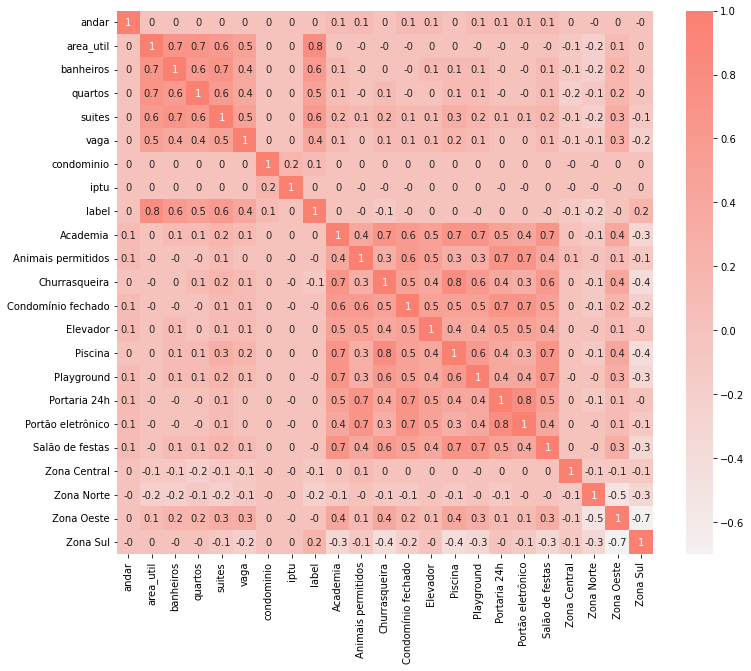

In [20]:
plt.figure(figsize=(12,10))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)

#Criação dos modelos de regressão

In [21]:
from pyspark.ml.regression import LinearRegression

In [22]:
treino, teste = dados_vetorizado.randomSplit([0.7, 0.3], seed=101) # é interessante definir uma seed de aleatoriedade para fazer comparação com resultados de outros testes

In [23]:
treino.count() 

46503

In [24]:
teste.count()

20048

In [25]:
lr = LinearRegression()

In [26]:
modelo_lr = lr.fit(treino)

In [27]:
previsoes_lr_treino = modelo_lr.transform(treino)
previsoes_lr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(23,[0,1,2,3,4,5,...| 580000.0| 579999.9999999986|
|(23,[0,1,2,3,4,5,...|3050000.0| 3049999.999999999|
|(23,[0,1,2,3,4,5,...|1590000.0|1589999.9999999984|
|(23,[0,1,2,3,4,5,...|1600000.0|1599999.9999999988|
|(23,[0,1,2,3,4,5,...| 390000.0|389999.99999999796|
|(23,[0,1,2,3,4,5,...| 917000.0| 916999.9999999987|
|(23,[0,1,2,3,4,5,...|1390000.0|1389999.9999999986|
|(23,[0,1,2,3,4,5,...|1050000.0|1049999.9999999984|
|(23,[0,1,2,3,4,5,...| 550000.0| 549999.9999999977|
|(23,[0,1,2,3,4,5,...|1120000.0|1119999.9999999984|
|(23,[0,1,2,3,4,5,...| 650000.0| 649999.9999999995|
|(23,[0,1,2,3,4,5,...| 640000.0| 639999.9999999988|
|(23,[0,1,2,3,4,5,...|1265000.0|1265000.0000000002|
|(23,[0,1,2,3,4,5,...| 906500.0| 906499.9999999987|
|(23,[0,1,2,3,4,5,...| 365000.0|364999.99999999854|
|(23,[0,1,2,3,4,5,...| 560000.0| 559999.9999999999|
|(23,[0,1,2,

#Avaliação dos modelos

In [28]:
resumo_treino = modelo_lr.summary

In [29]:
"""
R2 (ou **coeficiente de determinação**):
é uma medida estatística que representa a 
porcentagem de variação da variável resposta 
que é explicada pelo modelo de regressão. 
Por se tratar de uma porcentagem, seu valor 
varia de 0 a 1.
"""
resumo_treino.r2 

1.0

In [30]:
"""
RMSE (ou Raiz do Erro Quadrático Médio):
é a métrica que calcula a raiz quadrada do erro 
médio entre os valores reais e as predições da 
regressão. Quanto menor esse valor, melhor será 
o modelo, uma vez que estará cometendo menos erros.
"""
resumo_treino.rootMeanSquaredError

7.998662077689472e-10

In [31]:
resumo_teste = modelo_lr.evaluate(teste)

In [32]:
resumo_teste.r2

1.0

In [33]:
resumo_teste.rootMeanSquaredError

8.09400298219593e-10

In [34]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R²: 1.000000
RMSE: 0.000000

Dados de Teste
R²: 1.000000
RMSE: 0.000000
